<center> <h1> TP4: Film Synopsis similarity </h1> </center>

In [2]:
import pandas as pd

df = pd.DataFrame()

df['title'] = ['The Avengers ', 'Avengers: Endgame','Interstellar']
df['date'] = ['2012','2019','2014']
df['synopsis'] = ['']*len(df['title'])  # Initialize with empty strings

file_names = ['Film_1_Avengers_2012.txt', 'Film_2_Avengers_EndGame_2019.txt', 'Film_3_Interstellar_2014.txt']

for i, file_name in enumerate(file_names):
    with open(f'data/{file_name}', 'r') as file:
        df.loc[i, 'synopsis'] = file.read()  # Assign the file content to the corresponding row

In [3]:
df

,title,date,synopsis
0,The Avengers,2012,The Asgardian Loki (Tom Hiddleston) encounters...
1,Avengers: Endgame,2019,"In 2018 Clint Barton, who is under house arres..."
2,Interstellar,2014,"In the future, crop blight has caused civiliza..."


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'synopsis' column
X = vectorizer.fit_transform(df['synopsis'])

# Convert the result to an array and print it
bag_of_words = X.toarray()
print(bag_of_words)

# If you want to see the feature names (words)
print(vectorizer.get_feature_names_out())

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 1 4 0]
 [2 1 4 ... 0 0 1]]
['10' '100s' '12' ... 'yet' 'york' 'yrs']


In [6]:
# tf idf
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize the TfidfTransformer
transformer = TfidfTransformer()
results = transformer.fit_transform(bag_of_words)

# Convert the result to an array and print it
tfidf = results.toarray()
print(tfidf)


[[0.         0.         0.         ... 0.         0.00923911 0.        ]
 [0.         0.         0.         ... 0.00563204 0.01713324 0.        ]
 [0.02650737 0.01325368 0.05301473 ... 0.         0.         0.01325368]]


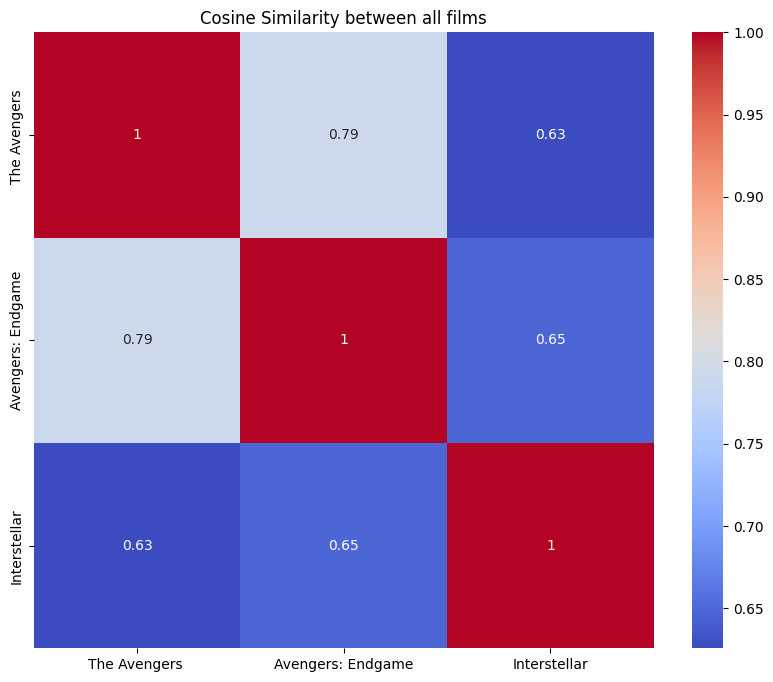

In [8]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the cosine similarity for all pairs of films
cosine_sim_matrix = cosine_similarity(tfidf)

# Plot the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_matrix, annot=True, cmap='coolwarm', xticklabels=df['title'], yticklabels=df['title'])
plt.title('Cosine Similarity between all films')
plt.show()

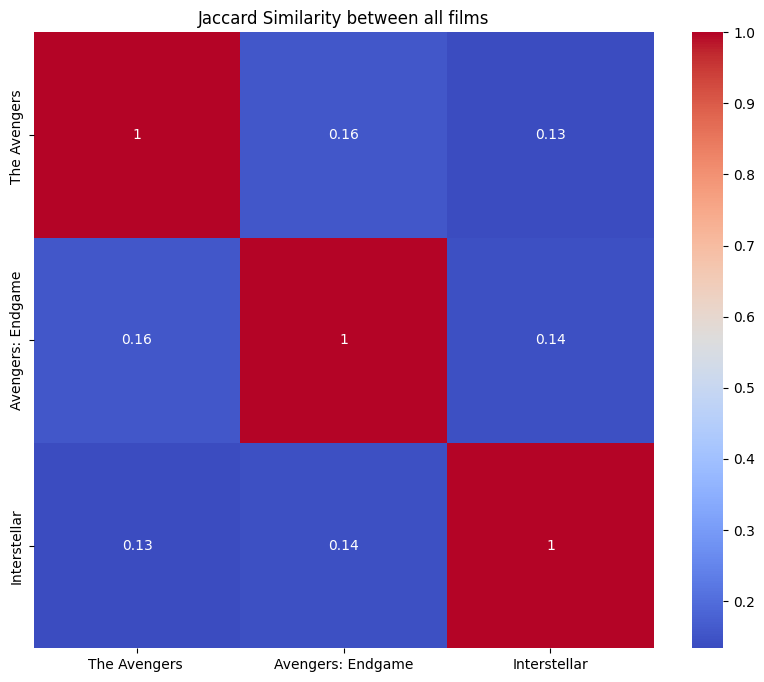

In [9]:
from sklearn.metrics import jaccard_score
import numpy as np

# Convert the bag of words to boolean values
bool_bag_of_words = bag_of_words > 0

# Initialize an empty matrix for the Jaccard similarities
jaccard_sim_matrix = np.zeros((len(df), len(df)))

# Compute the Jaccard similarity for all pairs of films
for i in range(len(df)):
    for j in range(len(df)):
        jaccard_sim_matrix[i, j] = jaccard_score(bool_bag_of_words[i], bool_bag_of_words[j])

# Plot the Jaccard similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_sim_matrix, annot=True, cmap='coolwarm', xticklabels=df['title'], yticklabels=df['title'])
plt.title('Jaccard Similarity between all films')
plt.show()

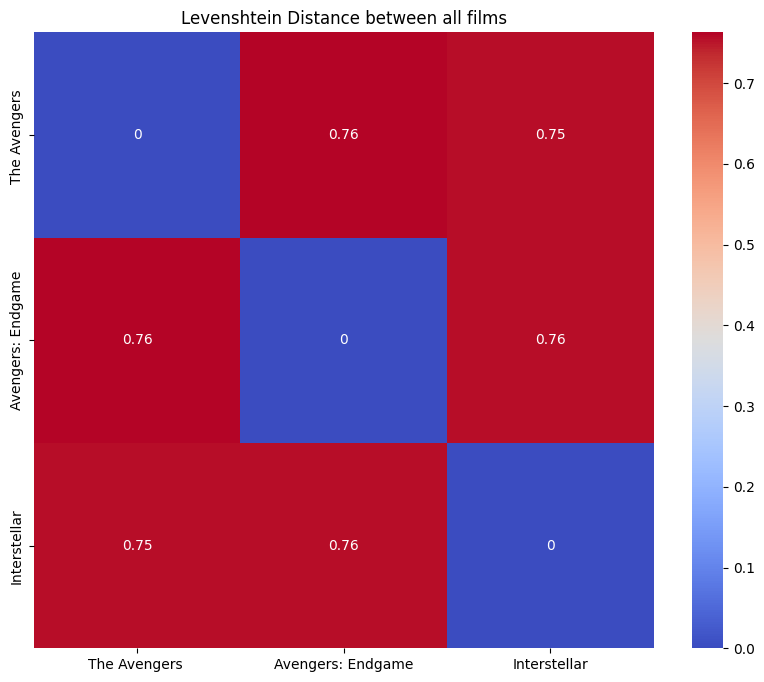

In [13]:
import Levenshtein as lev
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define a function to calculate the Levenshtein distance
def levenshtein_similarity(s1, s2):
    lev_dist = lev.distance(s1, s2)
    max_len = max(len(s1), len(s2))
    return lev_dist / max_len
# Initialize an empty matrix for the Levenshtein distances
levenshtein_dist_matrix = np.zeros((len(df), len(df)))

# Compute the Levenshtein distance for all pairs of films
for i in range(len(df)):
    for j in range(len(df)):
        levenshtein_dist_matrix[i, j] = levenshtein_similarity(df.loc[i, 'synopsis'], df.loc[j, 'synopsis'])

# Plot the Levenshtein distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(levenshtein_dist_matrix, annot=True, cmap='coolwarm', xticklabels=df['title'], yticklabels=df['title'])
plt.title('Levenshtein Distance between all films')
plt.show()

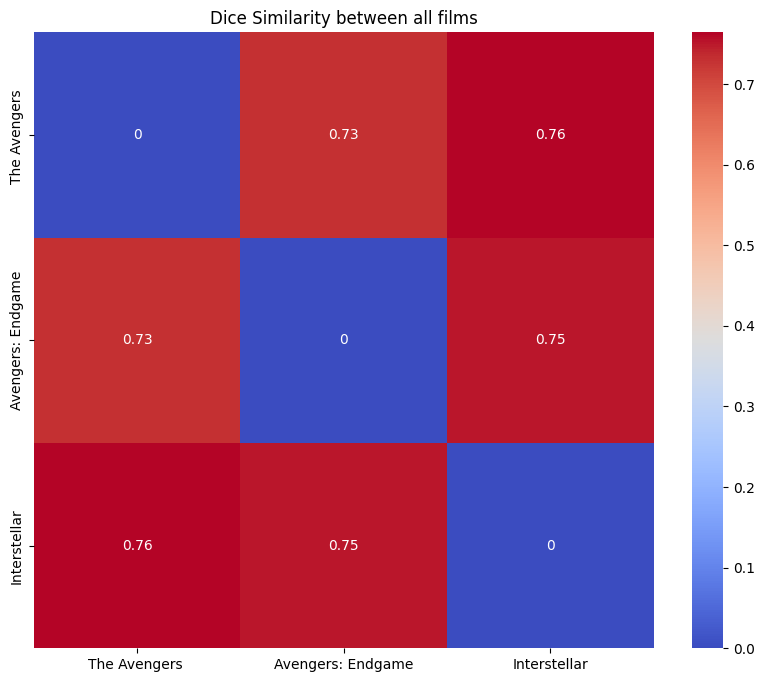

In [14]:
from scipy.spatial.distance import dice
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the bag of words to boolean values
bool_bag_of_words = bag_of_words > 0

# Initialize an empty matrix for the Dice similarities
dice_sim_matrix = np.zeros((len(df), len(df)))

# Compute the Dice similarity for all pairs of films
for i in range(len(df)):
    for j in range(len(df)):
        dice_sim_matrix[i, j] = dice(bool_bag_of_words[i], bool_bag_of_words[j])

# Plot the Dice similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(dice_sim_matrix, annot=True, cmap='coolwarm', xticklabels=df['title'], yticklabels=df['title'])
plt.title('Dice Similarity between all films')
plt.show()

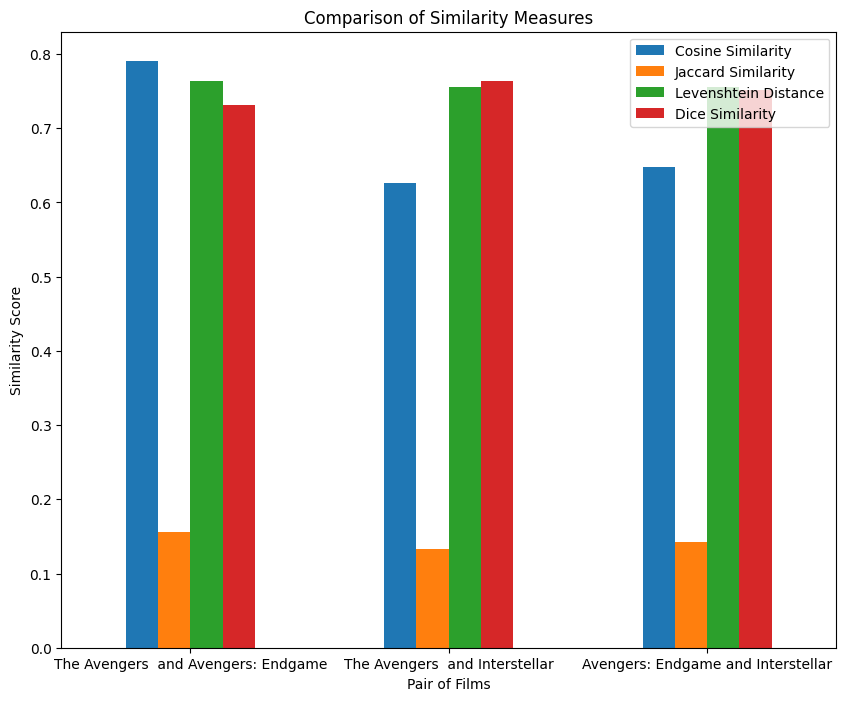

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

cosine_sim_flat = cosine_sim_matrix.flatten()
jaccard_sim_flat = jaccard_sim_matrix.flatten()
levenshtein_dist_flat = levenshtein_dist_matrix.flatten()
dice_sim_flat = dice_sim_matrix.flatten()

# Get the number of films
num_films = int(cosine_sim_matrix.shape[0])

# Initialize an empty DataFrame
similarity_df = pd.DataFrame()

# Iterate over each pair of films
for i in range(num_films):
    for j in range(i+1, num_films):
        # Calculate the index in the flattened array corresponding to this pair of films
        index = i * num_films + j

        # Select the corresponding elements from each flattened similarity array
        cosine_sim_pair = cosine_sim_flat[index]
        jaccard_sim_pair = jaccard_sim_flat[index]
        levenshtein_dist_pair = levenshtein_dist_flat[index]
        dice_sim_pair = dice_sim_flat[index]

        # Create a DataFrame with these elements
        similarity_df_pair = pd.DataFrame({
            'Cosine Similarity': [cosine_sim_pair],
            'Jaccard Similarity': [jaccard_sim_pair],
            'Levenshtein Distance': [levenshtein_dist_pair],
            'Dice Similarity': [dice_sim_pair]
        }, index=[f'{df.loc[i, "title"]} and {df.loc[j, "title"]}'])

        # Append this DataFrame to the main DataFrame
        similarity_df = pd.concat([similarity_df, similarity_df_pair])

# Plot a bar chart for each pair of films
similarity_df.plot.bar(rot=0, figsize=(10, 8))
plt.title('Comparison of Similarity Measures')
plt.xlabel('Pair of Films')
plt.ylabel('Similarity Score')
plt.show()